In [1]:
# 1. Import des librairies
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# 2. Charger le dataset clean
df = pd.read_csv('/content/clean_churn_dataset.csv')

# 3. Définir X et y
X = df.drop('Exited', axis=1)
y = df['Exited']

# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 5. Entraîner le Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# 6. Prédictions
y_pred = rf.predict(X_test)

# 7. Évaluer
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.9986666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Matrice de confusion:
 [[2387    2]
 [   2  609]]


In [2]:
# Recréer un Random Forest avec moins de profondeur
rf_simplified = RandomForestClassifier(
    n_estimators=100,
    max_depth=5,
    random_state=42
)

# Entraîner sur le même train
rf_simplified.fit(X_train, y_train)

# Prédire
y_pred_simple = rf_simplified.predict(X_test)

# Évaluer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy:", accuracy_score(y_test, y_pred_simple))
print("\nClassification Report:\n", classification_report(y_test, y_pred_simple))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_simple))


Accuracy: 0.9986666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Matrice de confusion:
 [[2387    2]
 [   2  609]]


In [3]:
from sklearn.model_selection import cross_val_score

# Validation croisée en 5 folds
cv_scores = cross_val_score(
    rf_simplified, X, y,
    cv=5,
    scoring='accuracy'
)

# Afficher les résultats
print("Scores de chaque fold :", cv_scores)
print("Accuracy moyenne :", cv_scores.mean())


Scores de chaque fold : [0.995 1.    1.    1.    0.998]
Accuracy moyenne : 0.9986


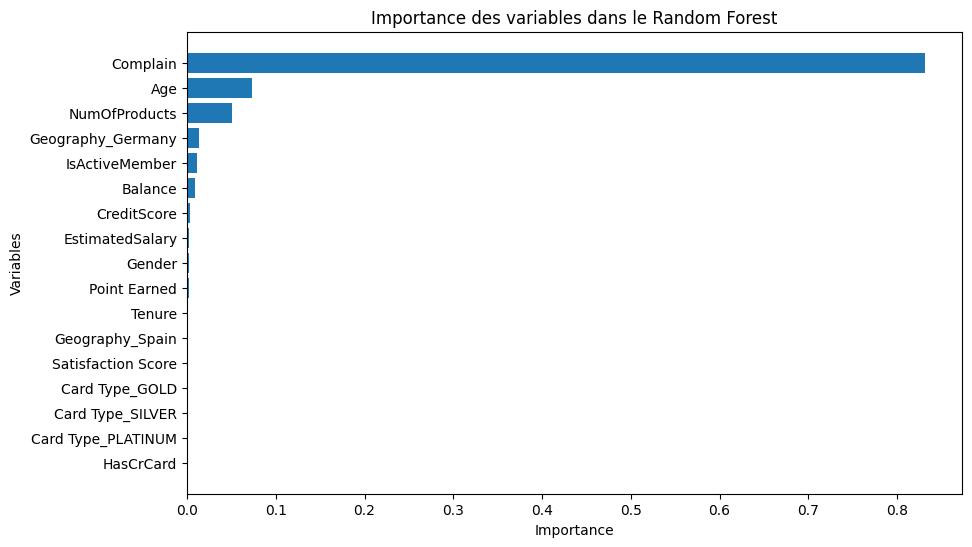

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Récupérer les importances
importances = rf_simplified.feature_importances_
features = X.columns

# Trier les indices par importance croissante
sorted_idx = np.argsort(importances)

# Afficher le graphique
plt.figure(figsize=(10,6))
plt.barh(features[sorted_idx], importances[sorted_idx])
plt.title("Importance des variables dans le Random Forest")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.show()


In [5]:
from sklearn.linear_model import LogisticRegression

# 1. Créer le modèle
logreg = LogisticRegression(max_iter=1000, random_state=42)

# 2. Entraîner
logreg.fit(X_train, y_train)

# 3. Prédire
y_pred_logreg = logreg.predict(X_test)

# 4. Évaluer
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

print("Accuracy Logistic Regression:", accuracy_score(y_test, y_pred_logreg))
print("\nClassification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nMatrice de confusion:\n", confusion_matrix(y_test, y_pred_logreg))


Accuracy Logistic Regression: 0.9986666666666667

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2389
           1       1.00      1.00      1.00       611

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000


Matrice de confusion:
 [[2387    2]
 [   2  609]]


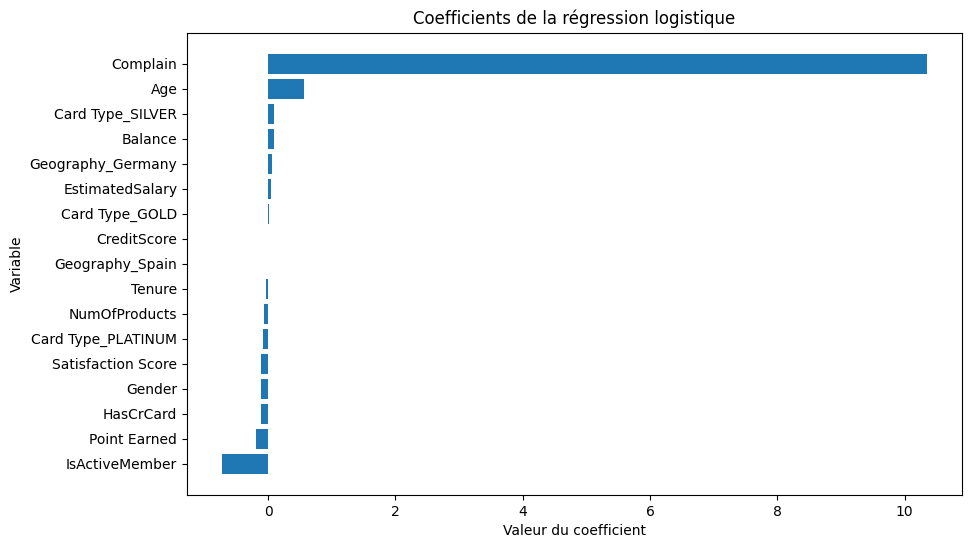

In [6]:
coefficients = pd.DataFrame({
    'Variable': X.columns,
    'Coefficient': logreg.coef_[0]
}).sort_values(by='Coefficient')

# Afficher
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(coefficients['Variable'], coefficients['Coefficient'])
plt.title('Coefficients de la régression logistique')
plt.xlabel('Valeur du coefficient')
plt.ylabel('Variable')
plt.show()


AUC Random Forest : 0.9993460891058925
AUC Logistic Regression : 0.9994060337923613


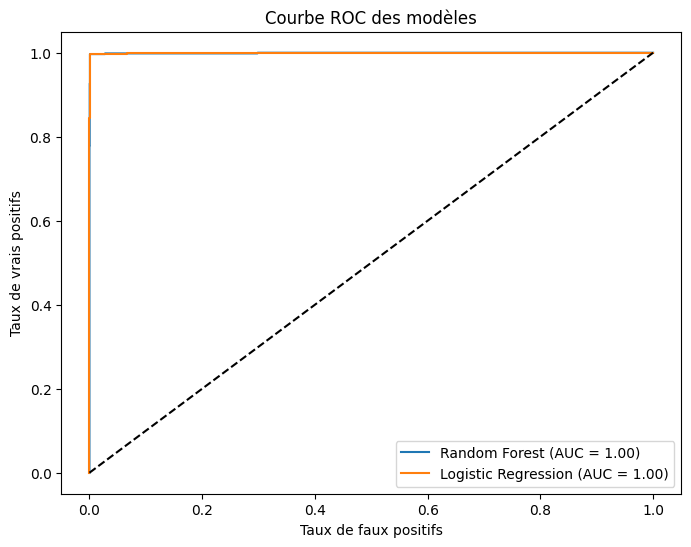

In [7]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Prédire les probabilités
y_proba_rf = rf_simplified.predict_proba(X_test)[:,1]
y_proba_logreg = logreg.predict_proba(X_test)[:,1]

# Calculer AUC
auc_rf = roc_auc_score(y_test, y_proba_rf)
auc_logreg = roc_auc_score(y_test, y_proba_logreg)

print("AUC Random Forest :", auc_rf)
print("AUC Logistic Regression :", auc_logreg)

# Tracer les courbes ROC
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_log, tpr_log, _ = roc_curve(y_test, y_proba_logreg)

plt.figure(figsize=(8,6))
plt.plot(fpr_rf, tpr_rf, label="Random Forest (AUC = {:.2f})".format(auc_rf))
plt.plot(fpr_log, tpr_log, label="Logistic Regression (AUC = {:.2f})".format(auc_logreg))
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("Taux de faux positifs")
plt.ylabel("Taux de vrais positifs")
plt.title("Courbe ROC des modèles")
plt.legend()
plt.show()
